In [4]:
import numpy as np
from DataPreprocessing import *

In [2]:
dat=np.load('trial_av_dat.npy')

In [3]:
print(dat.shape)

(778, 75)


In [6]:
data_path= '/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar'
good_cells, brain_regions,br = get_good_cells(data_path)

In [8]:
print(brain_regions)

['ORB' 'MOs' 'ORB' 'ORB' 'MOs' 'MOs' 'ORB' 'MOs' 'ORB' 'ORB' 'MOs' 'MOs'
 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'OLF' 'ORB' 'OLF' 'ORB'
 'MOs' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'MOs' 'ORB'
 'ORB' 'ORB' 'MOs' 'MOs' 'ORB' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB'
 'MOs' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'MOs' 'ORB'
 'ORB' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB'
 'ORB' 'ORB' 'ORB' 'MOs' 'MOs' 'MOs' 'ORB' 'MOs' 'ORB' 'ORB' 'MOs' 'MOs'
 'OLF' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB' 'MOs' 'ORB' 'ORB' 'MOs' 'MOs' 'ORB'
 'ORB' 'OLF' 'ORB' 'ORB' 'ORB' 'ORB' 'MOs' 'ORB' 'ORB' 'OLF' 'MOs' 'MOs'
 'MOs' 'OLF' 'MOs' 'ORB' 'MOs' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB' 'MOs' 'ORB'
 'MOs' 'MOs' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB' 'ORB' 'OLF' 'ORB' 'ORB' 'OLF'
 'ORB' 'ORB' 'ORB' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB' 'MOs' 'ORB' 'ORB' 'ORB'
 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'ORB' 'MOs' 'MOs' 'ORB'
 'ORB' 'ORB' 'MOs' 'MOs' 'MOs' 'ORB' 'MOs' 'ORB' 'M

In [71]:
mos=dat[brain_regions=='MOs']
print(mos.shape)
scm=dat[brain_regions=='SCs']
print(scm.shape)

(122, 75)
(114, 75)


In [72]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mos.T, scm.T, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)

(50, 122) (50, 114)


In [73]:
nt=75
nsegs = 10
nlen  = nt/nsegs
ninds = np.linspace(0,nt-nlen,nsegs).astype(int)
itest = (ninds[:,np.newaxis] + np.arange(0,nlen*0.25,1,int)).flatten()
itrain = np.ones(nt, np.bool)
itrain[itest] = 0



In [80]:
from sklearn.linear_model import Ridge

mod=Ridge()

mod.fit(X_train,y_train)

#mod.score(X_test,y_test)
pr=mod.predict(X_test)
print(pr.shape)
print(y_test.shape)
raw_corr=[]
for j in range(0,25):
    print(np.corrcoef(pr[:,j],y_test[:,j])[0,1])
    raw_corr.append(np.corrcoef(pr[:,j],y_test[:,j])[0,1])

(25, 114)
(25, 114)
-0.36288056845841876
0.5489782631629756
0.3890028336106365
0.4736634837197853
0.23418380002282646
0.3020631598483464
0.4239269823968717
0.18884926510167618
0.20987455804924485
0.5768577814987663
0.35852823974267434
-0.03639910830120782
0.8783603126633229
0.4040835311081624
0.4594511975670338
0.2650282509369919
0.2925319141705318
0.698864583299336
0.4267658919087802
0.449938203256337
0.861971272444377
-0.06323630492527217
0.4651200858440882
0.12130289103630654
0.5976955349820574


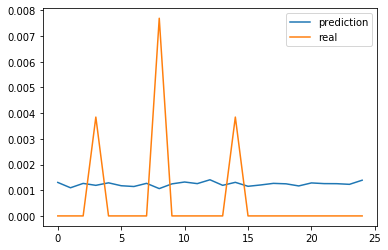

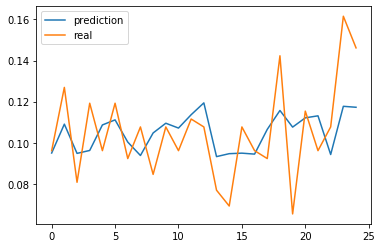

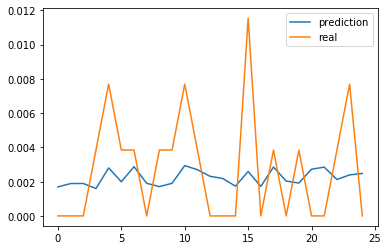

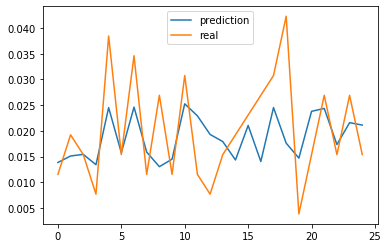

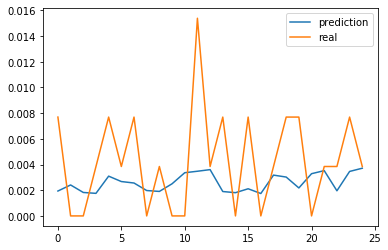

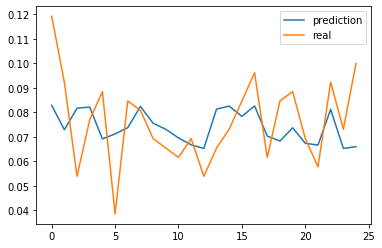

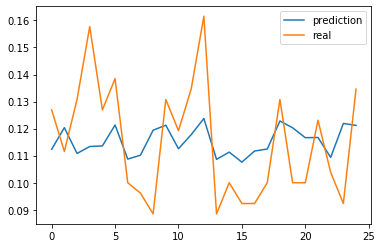

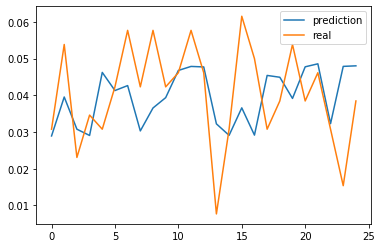

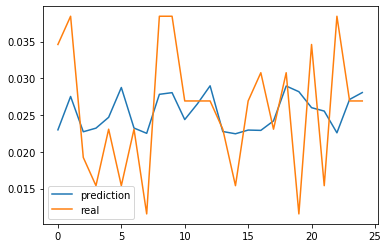

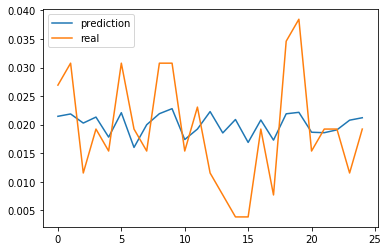

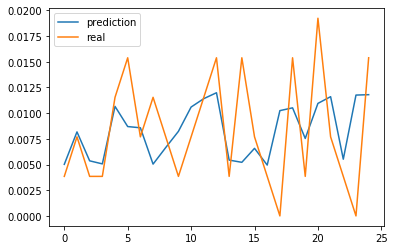

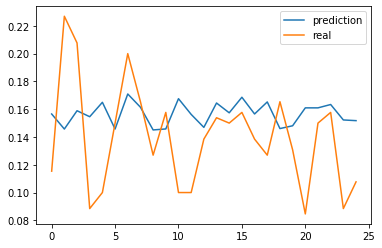

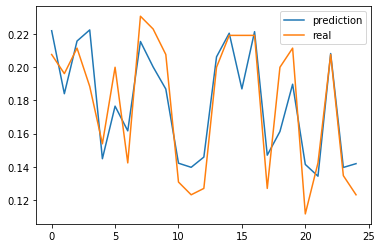

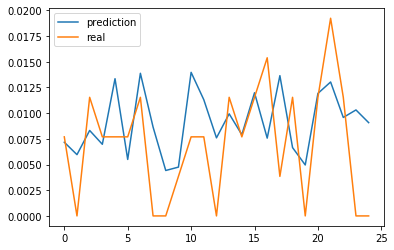

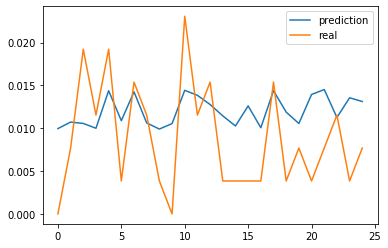

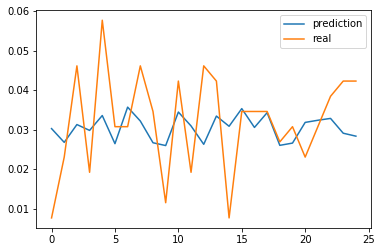

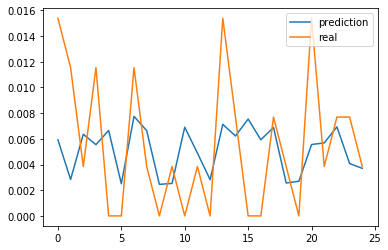

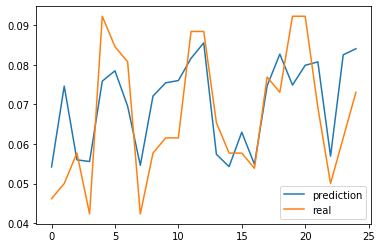

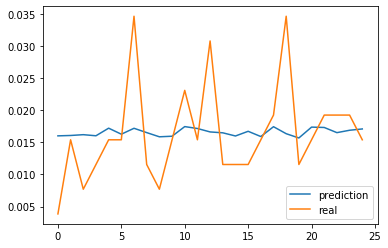

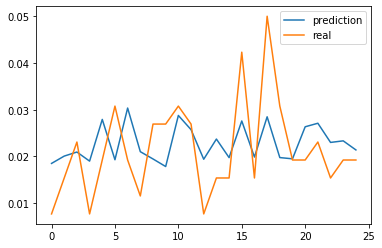

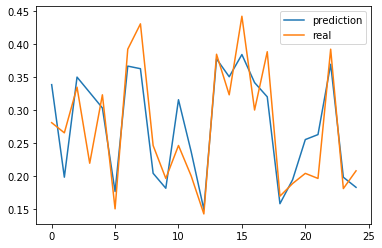

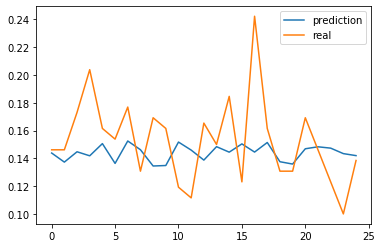

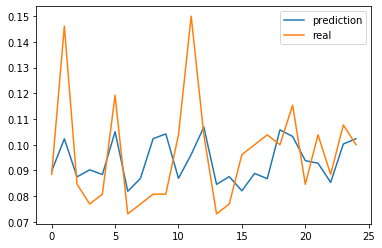

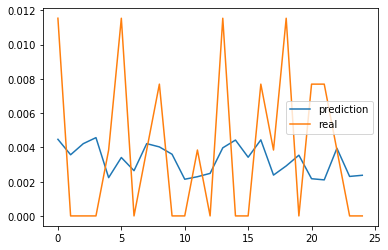

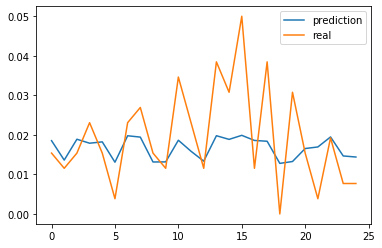

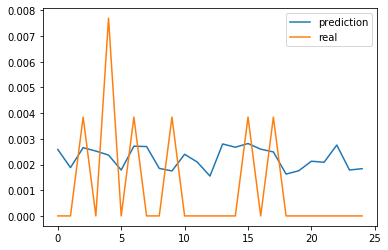

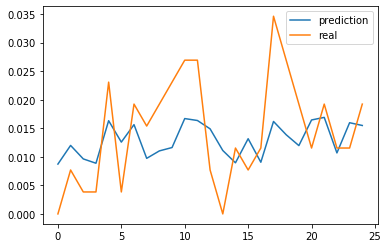

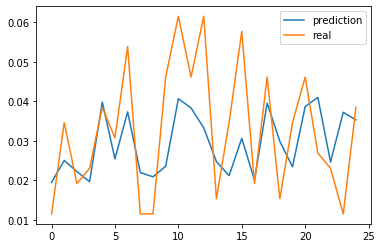

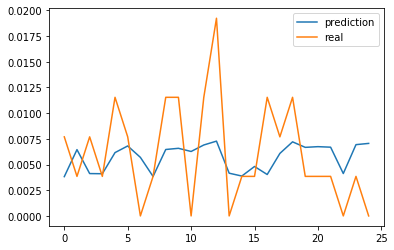

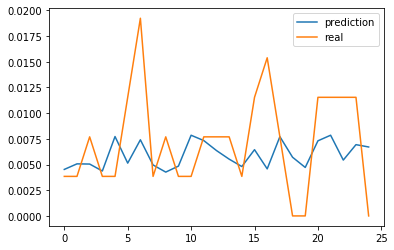

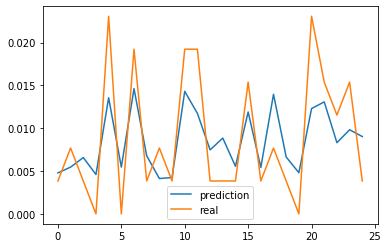

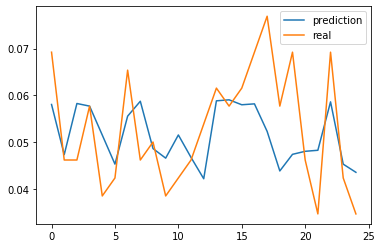

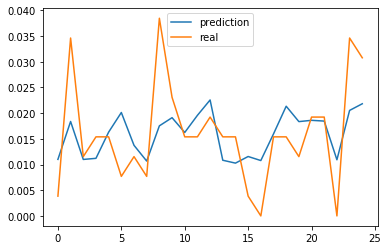

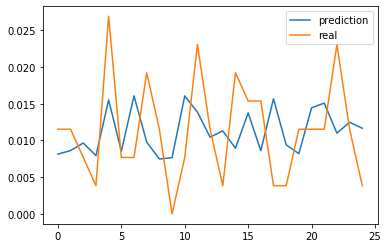

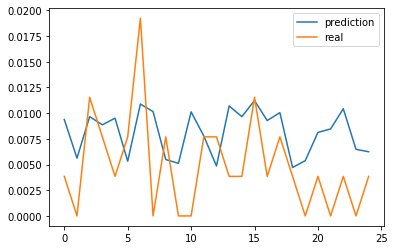

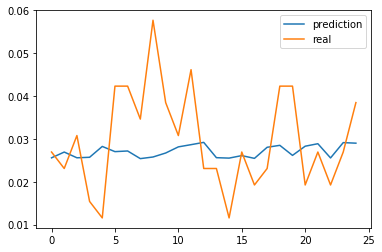

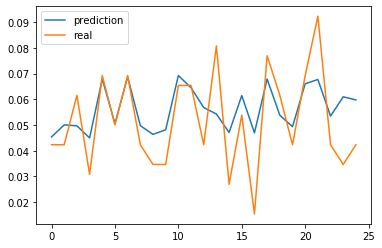

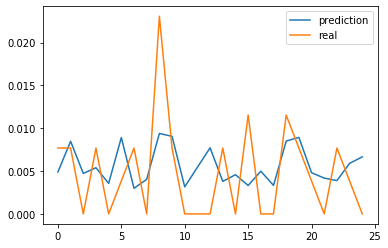

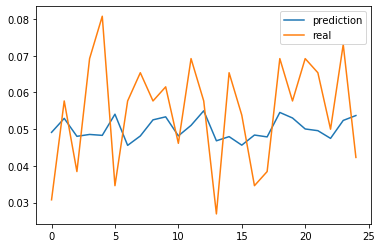

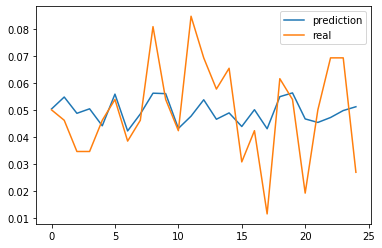

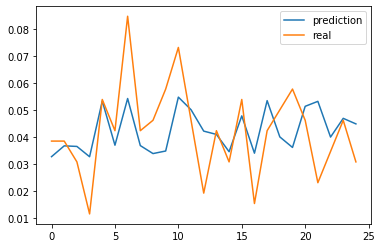

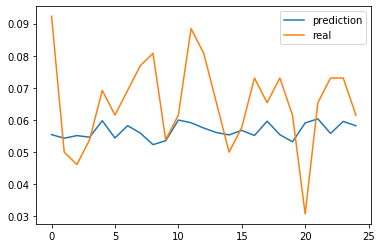

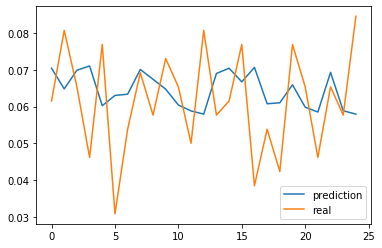

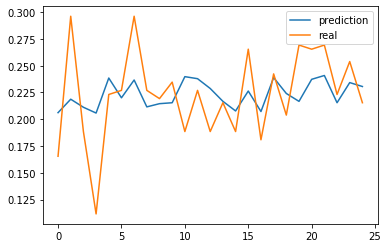

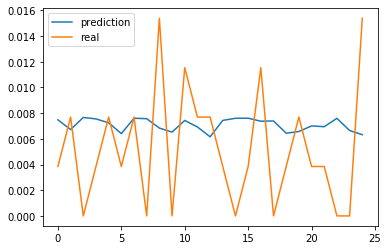

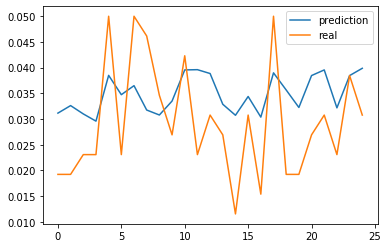

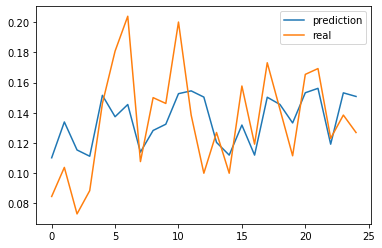

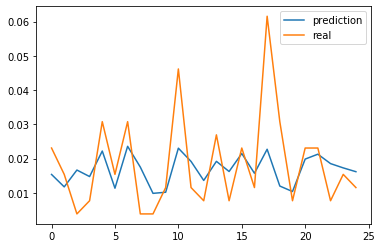

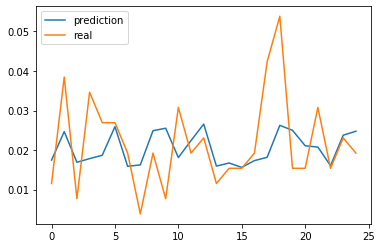

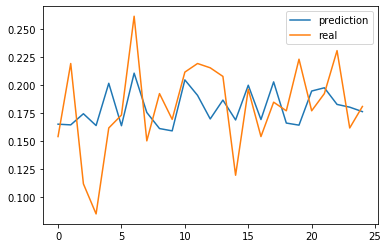

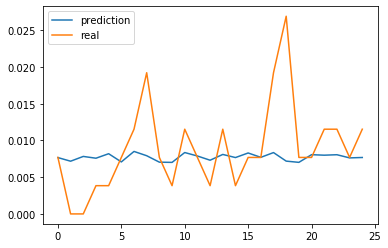

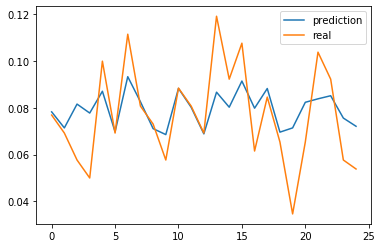

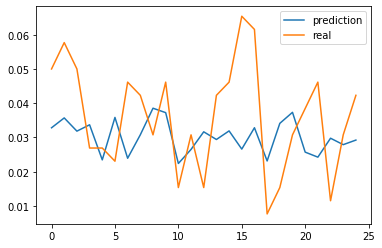

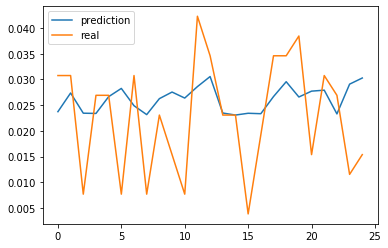

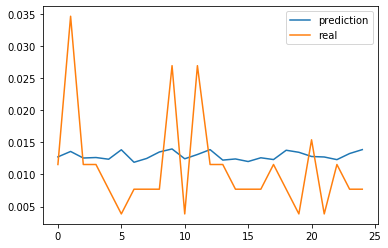

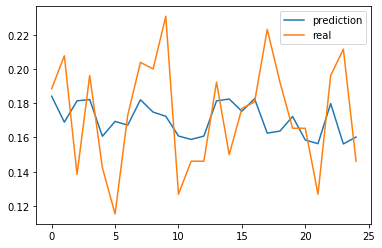

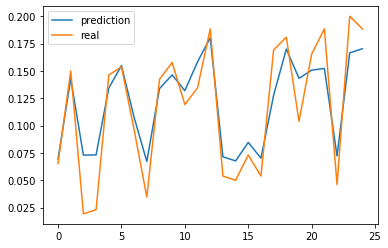

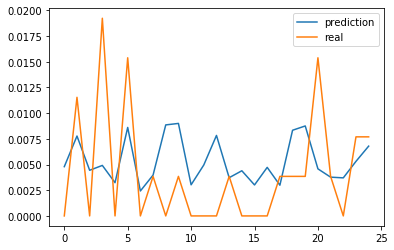

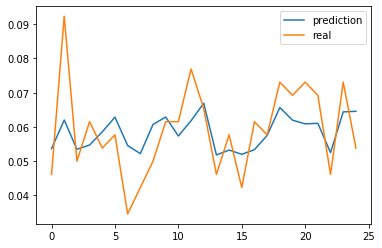

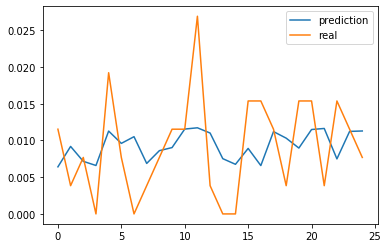

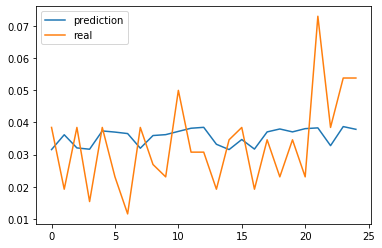

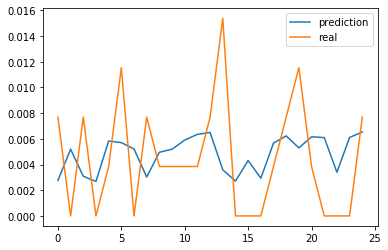

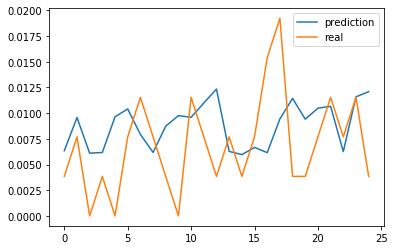

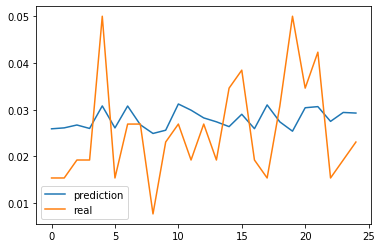

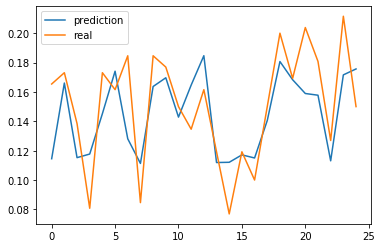

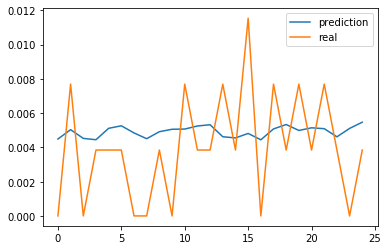

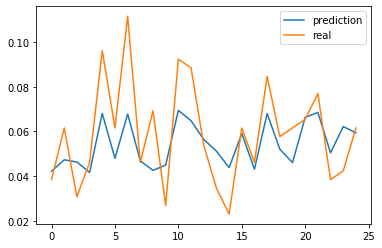

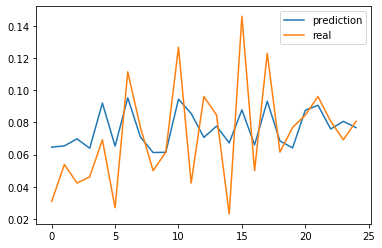

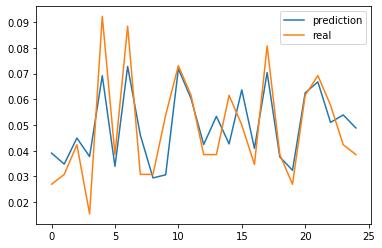

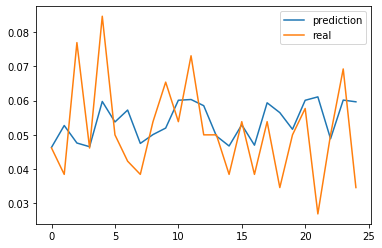

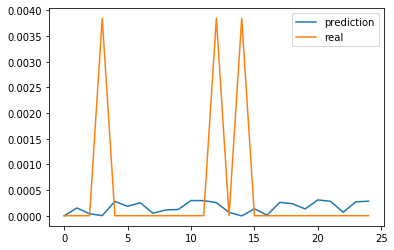

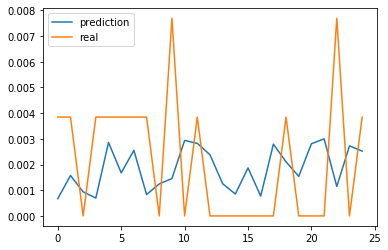

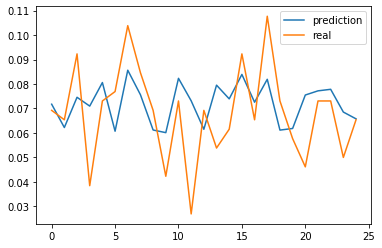

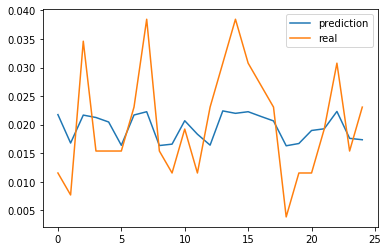

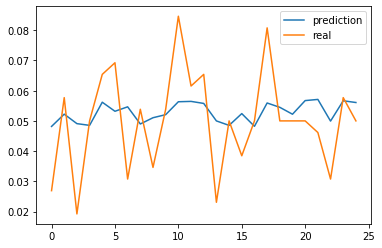

In [86]:
for j in range(0,75):
    plt.plot(pr[:,j],label='prediction')
    plt.plot(y_test[:,j],label='real')
    plt.legend()
    plt.show()

In [79]:
from sklearn.linear_model import Ridge

mod=Ridge()

mod.fit(mos.T[itrain,:],scm.T[itrain])

#mod.score(X_test,y_test)
pr=mod.predict(mos.T[itest])
print(pr.shape)
print(scm[itest].shape)
#print(y_test.shape)
for j in range(0,25):
    print(np.corrcoef(pr[:,j],scm.T[itest,j])[0,1])


(20, 114)
(20, 75)
-0.06846239896889393
0.5847671063622039
0.06108030806143756
0.5322182013755157
-0.047321153996154976
0.2288919850744728
0.4503038746579956
0.3502767340934775
0.18669392685187505
0.2682226581227357
0.21266275445939967
0.05866962770464035
0.896845063390075
0.4234554126324464
0.22386131788084881
-0.3279020511379669
0.3553856016441843
0.6955336696360201
0.18301772153319526
0.81944544392996
0.8749825829662815
0.13555119166719048
0.45311716385540673
0.0027931185086974204
0.5621007135478674


In [68]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pcs_train=pca.fit_transform(X_train)
pcs_test=pca.transform(X_test)

mod=Ridge()

mod.fit(pcs_train,y_train)

#mod.score(X_test,y_test)
print(pcs_test.shape)
pr=mod.predict(pcs_test)
print(pr.shape)
print(y_test.shape)
pcs_corr=[]
for j in range(0,25):
    print(np.corrcoef(pr[:,j],y_test[:,j])[0,1])
    pcs_corr.append(np.corrcoef(pr[:,j],y_test[:,j])[0,1])

(25, 10)
(25, 114)
(25, 114)
-0.42592086779294397
0.5495954852017989
0.38583296826724756
0.4815671287547819
0.23566093847899897
0.2955155439563294
0.4179029380916862
0.18689403691734752
0.21359792408011546
0.5620320927075104
0.35196530895333344
-0.029642361169912673
0.8790461877274832
0.3993671478247968
0.45077288520309217
0.2555986406148406
0.28635366579417243
0.7013317796802083
0.4609692925252289
0.44773399296057825
0.8620207202952732
-0.06545151491463097
0.4533135405761287
0.11521784193854125
0.6052682243048058


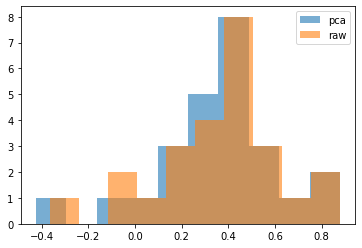

In [69]:
plt.hist(pcs_corr,label='pca',alpha=0.6)
plt.hist(raw_corr,label='raw',alpha=0.6)
plt.legend()

In [ ]:
plt.plot()

# BE